In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wi

In [2]:
def vander(t, y):
    return np.array([y[1], -y[0]+y[1]*(1-(y[0])**2)])

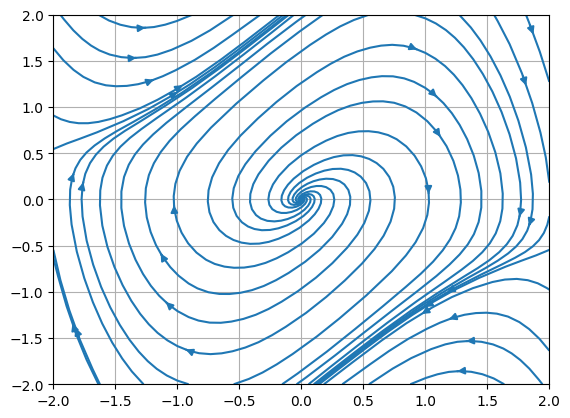

In [3]:
Y, X = np.mgrid[-2:2:10j, -2:2:10j]
U, V = vander(0, [X, Y])
plt.streamplot(X, Y, U, V, density=0.4, broken_streamlines=False)
plt.grid()
plt.show()

In [4]:
def dipole(t, y):
    return np.array([2*y[0]*y[1], y[1]**2-y[0]**2])

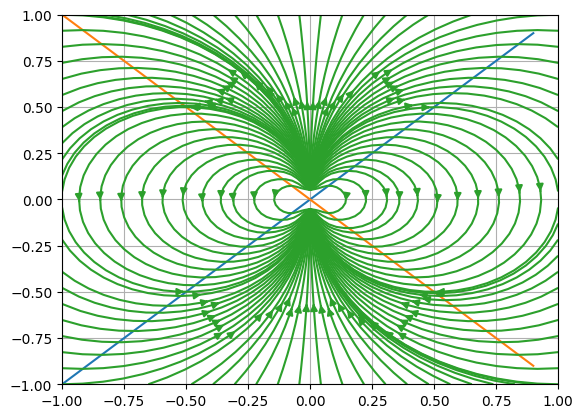

In [5]:
Y, X = np.mgrid[-1:1:20j, -1:1:20j]
x = np.arange(-1,1,0.1)
U, V = dipole(0, [X, Y])
plt.plot(x,x)
plt.plot(x,-x)
plt.streamplot(X, Y, U, V, density=0.8, broken_streamlines=False)
plt.grid()
plt.show()

In [6]:
def random(t, y):
    return np.array([y[1]**3-4*y[0], y[1]**3-y[1]-3*y[0]])

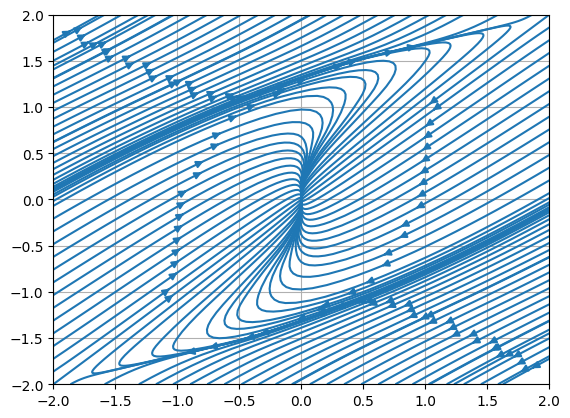

In [7]:
Y, X = np.mgrid[-2:2:10j, -2:2:10j]
x = np.arange(-1,1,0.1)
U, V = random(0, [X, Y])
plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

In [8]:
def conejos(t, y):
    return np.array([y[0]*(3-y[0]-y[1]), y[1]*(2-y[0]-y[1])])

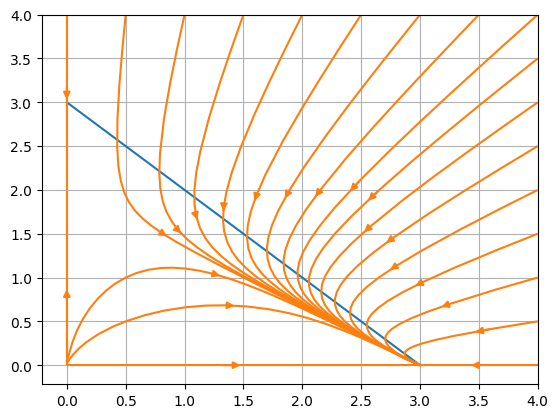

In [9]:
Y, X = np.mgrid[0:4:20j, 0:4:20j]
x = np.arange(0,3,0.01)
y = [3-x[i] for i in range(len(x))]
U, V = conejos(0, [X, Y])
plt.plot(x, y)
plt.streamplot(X, Y, U, V, density=0.3, broken_streamlines=False)
plt.grid()
plt.show()

In [10]:
def pendulo(t, y):
    return np.array([y[1], -y[0]**3-y[0]])

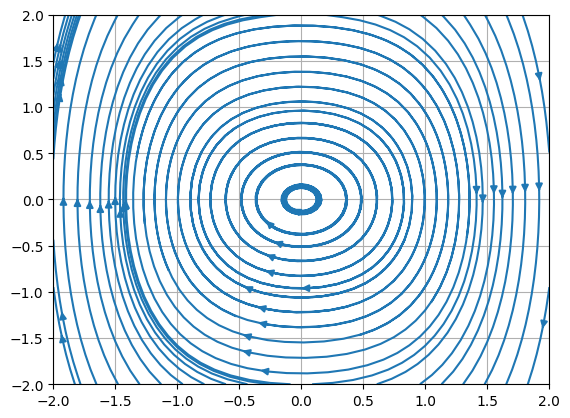

In [11]:
Y, X = np.mgrid[-2:2:100j, -2:2:100j]
U, V = pendulo(0, [X, Y])
plt.streamplot(X, Y, U, V, density=0.8, broken_streamlines=False)
plt.grid()
plt.show()

In [12]:
def centro(t, y):
    return np.array([y[1], y[0]**3-y[0]])

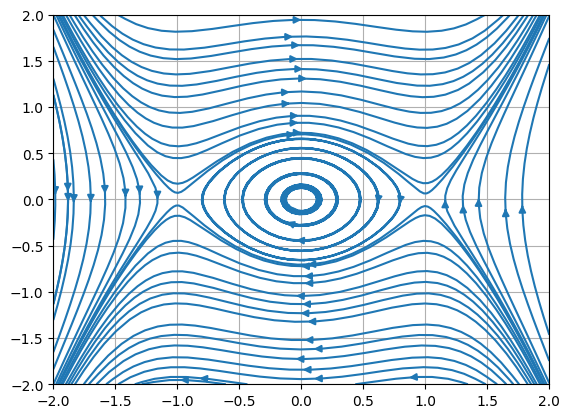

In [13]:
Y, X = np.mgrid[-2:2:100j, -2:2:100j]
U, V = centro(0, [X, Y])
plt.streamplot(X, Y, U, V, density=0.8, broken_streamlines=False)
plt.grid()
plt.show()

In [14]:
def espirales(a):

    def espiral(Y):
        x, y = Y
        return np.array([y+a*x*(x**2+y**2), -x+a*y*(x**2+y**2)])
    
    Y, X = np.mgrid[-1:1:5j, -1:1:5j]
    U, V = espiral([X, Y])
    plt.streamplot(X, Y, U, V, density=0.3, broken_streamlines=False)
    plt.grid()
    plt.show()

wi.interact(espirales, a = wi.FloatSlider(-1, min = -2, max = 0))

interactive(children=(FloatSlider(value=-1.0, description='a', max=0.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.espirales(a)>

In [15]:
def kepler(t, y):
    return np.array([y[2], y[3], y[0]/((y[0]**2+y[1]**2)**(3/2)), y[1]/((y[0]**2+y[1]**2)**(3/2))])

In [16]:
def Euler(a,b,n,F,y0):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*F(t[i], y[:,i])

    return (t,y)

In [17]:
t, y = Euler(0,50000,500000,kepler,np.array([10000,1000,0.0001,0.0001]))

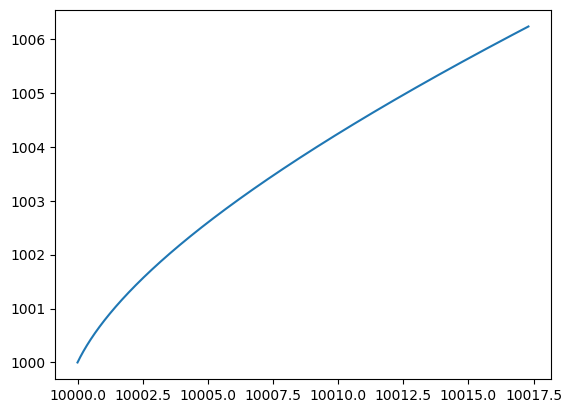

In [18]:
plt.plot(y[0],y[1])

In [ ]:
def R(r):
    def atractivo(t, y):
        return np.array([y[2], y[3], -y[0]/((y[0]**2+y[1]**2)**r), -y[1]/((y[0]**2+y[1]**2)**r)])
    
    y0 = np.array([1,1,0,0.08])
    
    t, y = Euler(0, 150, 100000, atractivo, y0)

    plt.plot(y[0], y[1])

wi.interact(R, r = wi.FloatSlider(value=0, min = 0, max = 2, step = 0.05))

interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.R(r)>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def plot(gamma):
    x = np.linspace(-8, 10, 400)
    y = np.linspace(-6, 6, 400)
    X, Y = np.meshgrid(x, y)

    # Campo vectorial
    U = Y
    V = gamma - np.sin(X)

    # Graficamos el campo y las nullclines
    plt.figure(figsize=(9, 6))
    plt.streamplot(X, Y, U, V, color='gray', broken_streamlines=False, density=2, linewidth=.8)

    plt.axhline(y=0, color='blue', linestyle='--', label='ω̇ = 0')

    if abs(gamma) <= 1:
        thetas = [np.arcsin(gamma), np.pi - np.arcsin(gamma)]
        for n in range(-1, 2):
            for th in thetas:
                theta_val = th + 2 * np.pi * n
                if n == 1:
                    plt.axvline(x=theta_val, color='red', linestyle='--', alpha=0.7, label = '$\dot{\Theta} = 0$')
                else:
                    plt.axvline(x=theta_val, color='red', linestyle='--', alpha=0.7)


    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo vectorial')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

wi.interact(plot, gamma=wi.FloatSlider(min=0, max=0.99, step=0.01))

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bravo\AppData\Local\Temp\ipykernel_16664\521460734.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.axvline(x=theta_val, color='red', linestyle='--', alpha=0.7, label = '$\dot{\Theta} = 0$')


interactive(children=(FloatSlider(value=0.0, description='gamma', max=0.99, step=0.01), Output()), _dom_classe…

<function __main__.plot(gamma)>

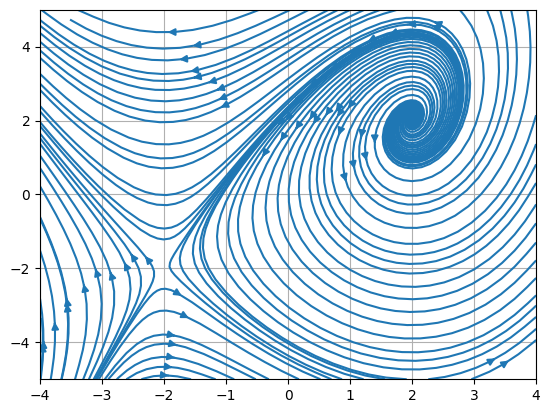

In [21]:
def fixed(t, y):
    return np.array([y[0]-y[1], y[0]**2-4])

Y, X = np.mgrid[-5:5:100j, -4:4:100j]
U, V = fixed(0, [X, Y])
plt.streamplot(X, Y, U, V, density=0.8, broken_streamlines=False)
plt.grid()
plt.show()

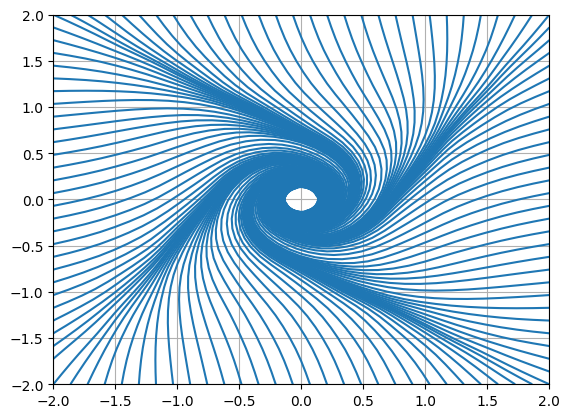

In [22]:
def lineal(t, y):
    return np.array([-y[1]+y[0]**3, y[0]+y[1]**3])

Y, X = np.mgrid[-2:2:10j, -2:2:10j]
U, V = lineal(0, [X, Y])
plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

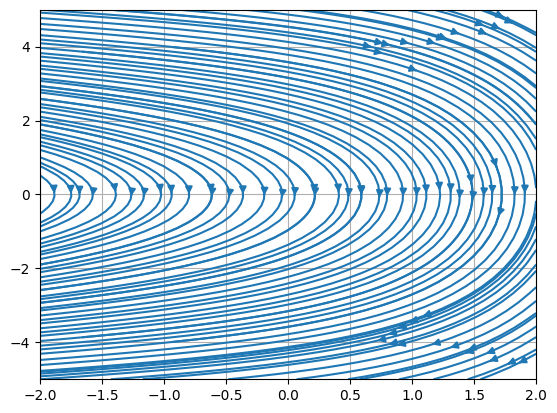

In [23]:
def exp(t, y):
    return np.array([y[1], -1-np.exp(y[0])])

Y, X = np.mgrid[-5:5:10j, -2:2:10j]
U, V = exp(0, [X, Y])
plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

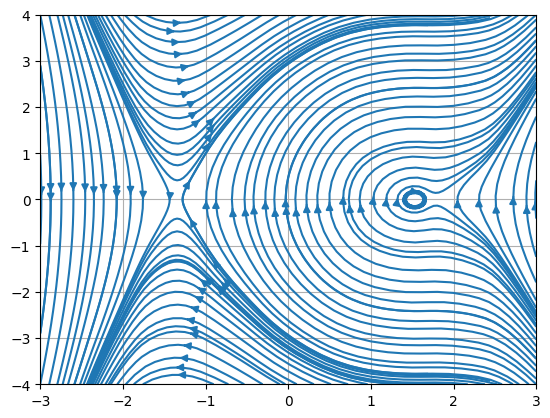

In [24]:
def apos(t, y):
    return np.array([y[1], (y[0]-2)*(y[0]**2-2)])

Y, X = np.mgrid[-4:4:10j, -3:3:10j]
U, V = apos(0, [X, Y])
plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

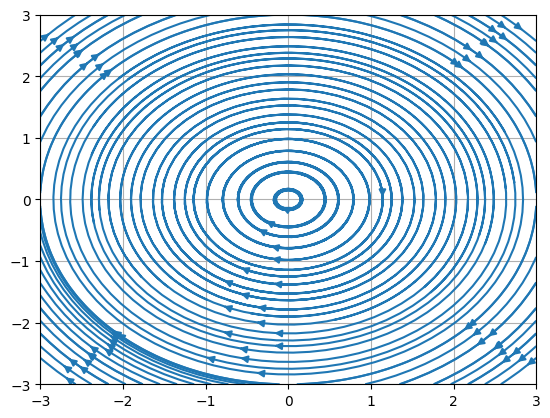

In [25]:
def armonico(t, y):
    return np.array([y[1], -y[0]])

Y, X = np.mgrid[-3:3:10j, -3:3:10j]
U, V = armonico(0, [X, Y])
plt.streamplot(X, Y, U, V, density=1, broken_streamlines=False)
plt.grid()
plt.show()

In [26]:
t, y = Euler(0, 1, 100000, armonico, np.array([0,1]))

In [27]:
H = y[1]**2/2+y[0]**2/2
H

array([0.5     , 0.5     , 0.5     , ..., 0.500005, 0.500005, 0.500005],
      shape=(100000,))

(0.0, 1.0)

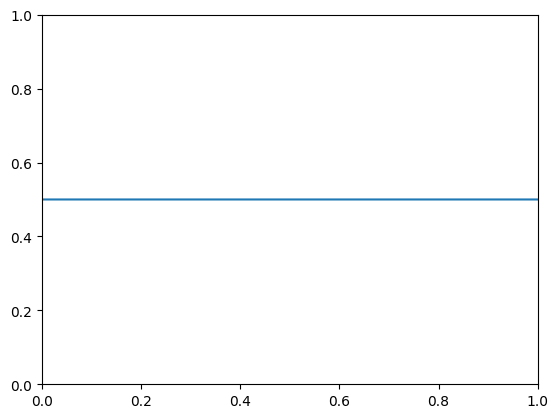

In [28]:
plt.plot(t, y[1]**2/2+y[0]**2/2)
plt.xlim(0,1)
plt.ylim(0,1)